In [1]:
## Take Code from /Covid19/MULTIseq_ALI/preprocess_muc21058_V2.ipynb and extend to all samples
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb

# Some custom functions
import ma_codes as codes
from ma_codes import mysize, mymap, gray_red

folder = "/mnt/platte_1/Projects/201109_Covid19_ALI/"

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

Running Scanpy 1.5.1, on 2020-12-07 14:31.


In [2]:
## Set global plotting parameters
plt.rcParams["figure.figsize"] = (6, 5)
sb.set_style("ticks")

In [3]:
from os import listdir
dge_path = "/mnt/smb/count_matrices_10x/201026_Covid19_ALI/"
#files = ["muc21058.h5"]
files = sorted([f for f in listdir(dge_path) if ".h5" in f])
files

['muc21058.h5',
 'muc21059.h5',
 'muc21060.h5',
 'muc21061.h5',
 'muc21062.h5',
 'muc21063.h5',
 'muc21064.h5',
 'muc21065.h5',
 'muc22965.h5',
 'muc22966.h5',
 'muc22967.h5',
 'muc22968.h5']

### Make a grouping file

In [4]:
samples = [f.replace(".h5", "") for f in files]
d = {"identifier": samples}
grouping = pd.DataFrame(data = d, columns = ["identifier", "patient", "barcode_round", "health_status", "cells"])
#grouping.to_csv(folder + "GroupingInfo.txt", sep = "\t", na_rep = "NA", index = False)

In [5]:
## Modify Grouping Table manually and read in again
grouping = pd.read_csv(folder + "GroupingInfo.txt", sep = '\t', header = (0), index_col = 0)
grouping

patient             name barcode_round  cells
identifier                                                   
muc21058    patient_1_2  ALI_1_Barcode_1         ALI_1  40000
muc21059    patient_1_2  ALI_1_Barcode_2         ALI_1  40000
muc21060    patient_1_2  ALI_1_Barcode_3         ALI_1  40000
muc21061    patient_1_2  ALI_1_Barcode_4         ALI_1  40000
muc21062      patient_3  ALI_2_Barcode_1         ALI_2  40000
muc21063      patient_3  ALI_2_Barcode_2         ALI_2  40000
muc21064      patient_3  ALI_2_Barcode_3         ALI_2  40000
muc21065      patient_3  ALI_2_Barcode_4         ALI_2  40000
muc22965      patient_4  ALI_3_Barcode_1         ALI_3  40000
muc22966      patient_4  ALI_3_Barcode_2         ALI_3  40000
muc22967      patient_4  ALI_3_Barcode_3         ALI_3  40000
muc22968      patient_4  ALI_3_Barcode_4         ALI_3  40000

In [6]:
def read_dges_10x(files, grouping):
    adatas = []
    for file in files:
        sample = file.replace(".h5", "")
        print("Reading DGE for sample %s\t%s" %(sample, codes.timestamp()))
        
        ## Read in dge (no filter for top barcodes in this)
        a = sc.read_10x_h5(dge_path + file)  ## don’t need to transpose here
        a.var_names_make_unique()
        del(a.var)                           ## don’t need this info stored in .h5 further

        a.obs["identifier"] = sample
        ## Add all columns from Grouping Table as Metainfo (apart from cells)
        for col in np.setdiff1d(grouping.columns, "cells"):
            a.obs[col] = grouping.loc[sample, col]
            
        ## For some reason the obs names are ending with "-1"
        a.obs_names = ["%s_%s" %(sample, cell.replace("-1", "")) for cell in a.obs_names.values]
        adatas.append(a)
        
    return adatas

### Read in count matrices

In [7]:
## Load dges and concatenate them into one adata file (assign categories automatically)
adatas = read_dges_10x(files, grouping)
adata = adatas[0].concatenate(adatas[1:], batch_key = "identifier", join = "outer", index_unique = None)
adata.obs["identifier"].cat.categories = samples

## As outer join is used when concatenating the adatas, set NaN entries to zero
adata.X = np.nan_to_num(adata.X)
adata.X = adata.X.toarray()
adata

Reading DGE for sample muc21058	07-12-2020 11:14:36
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc21058.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc21059	07-12-2020 11:14:40
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc21059.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc21060	07-12-2020 11:14:44
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc21060.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc21061	07-12-2020 11:14:48
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc21061.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc21062	07-12-2020 11:14:51
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc21062.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc21063	07-12-2020 11:14:55
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc21063.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc21064	07-12-2020 11:14:58
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc21064.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:03)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc21065	07-12-2020 11:15:02
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc21065.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc22965	07-12-2020 11:15:05
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc22965.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc22966	07-12-2020 11:15:08
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc22966.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc22967	07-12-2020 11:15:11
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc22967.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Reading DGE for sample muc22968	07-12-2020 11:15:14
reading /mnt/smb/count_matrices_10x/201026_Covid19_ALI/muc22968.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:02)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 414497 × 20635
    obs: 'identifier', 'barcode_round', 'name', 'patient'

### Preprocessing and Quality Control

In [8]:
## Ok in the beginning we have all of them
cov_genes = ["ORF1ab", "S", "ORF3a", "E", "M", "ORF6", "ORF7a", "ORF7b", "ORF8", "N", "ORF10",
             "ORF1ab-minus", "S-minus", "ORF3a-minus", "E-minus", "M-minus", "ORF6-minus",
             "ORF7a-minus", "ORF7b-minus", "ORF8-minus", "N-minus", "ORF10-minus"]
inter = [True for c in cov_genes if c in adata.var_names]
inter

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [9]:
# Quality control - calculate QC Metrics
adata.obs["n_counts"] = adata.X.sum(1)         # sums over rows = cells
adata.obs["n_genes"] = (adata.X > 0).sum(1)

## Human
mt_gene_mask = [gene.startswith("MT-") for gene in adata.var_names]
adata.obs["percent_mito"] = adata.X[:, mt_gene_mask].sum(1) / adata.obs["n_counts"]

## And also add viral percentages from the start!
viral_mask = [gene in cov_genes for gene in adata.var_names]
adata.obs["viral_counts"] = adata.X[:, viral_mask].sum(1)
adata.obs["percent_viral"] = adata.X[:, viral_mask].sum(1) / adata.obs["n_counts"]

In [10]:
sum(viral_mask)

22

In [11]:
## Summary Statistics before Filtering
info = pd.DataFrame(data = adata.obs.identifier.cat.categories, columns = ["identifier"])
info["n_counts"] = adata.obs.groupby(["identifier"])["n_counts"].median().values
info["n_genes"] = adata.obs.groupby(["identifier"])["n_genes"].median().values
info["percent_mito"] = adata.obs.groupby(["identifier"])["percent_mito"].mean().values
info["percent_viral"] = adata.obs.groupby(["identifier"])["percent_viral"].mean().values
info["viral_counts"] = adata.obs.groupby(["identifier"])["viral_counts"].mean().values
info["n_cells"] = adata.obs.groupby(["identifier"])["n_counts"].size().values

info

identifier  n_counts  n_genes  percent_mito  percent_viral  viral_counts  \
0    muc21058    9324.0     2453      0.034619       0.001525      4.113530   
1    muc21059    6648.0     2071      0.035330       0.001204      3.063110   
2    muc21060    6587.0     1991      0.031526       0.001118      2.572384   
3    muc21061    7186.0     2089      0.037398       0.001146      2.547030   
4    muc21062    4656.0     1725      0.087629       0.000223      0.909091   
5    muc21063    5165.0     1848      0.092897       0.000201      0.673732   
6    muc21064    5379.5     1877      0.090963       0.000258      1.022163   
7    muc21065    5055.0     1803      0.089417       0.000264      1.075170   
8    muc22965    5014.0     1801      0.121432       0.000340      1.224682   
9    muc22966    3757.0     1441      0.113052       0.000373      0.948282   
10   muc22967    4213.0     1562      0.114814       0.000356      1.015126   
11   muc22968    4707.0     1713      0.138209       0.000311      1.019845   

    n_cells  
0     31507  
1     34210  
2     34386  
3     32649  
4     36619  
5     31422  
6     36592  
7     36065  
8     34195  
9     37105  
10    37749  
11    31998

### Quality control - plot QC Metrics

... storing 'barcode_round' as categorical
... storing 'name' as categorical
... storing 'patient' as categorical
/home/agando/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/agando/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


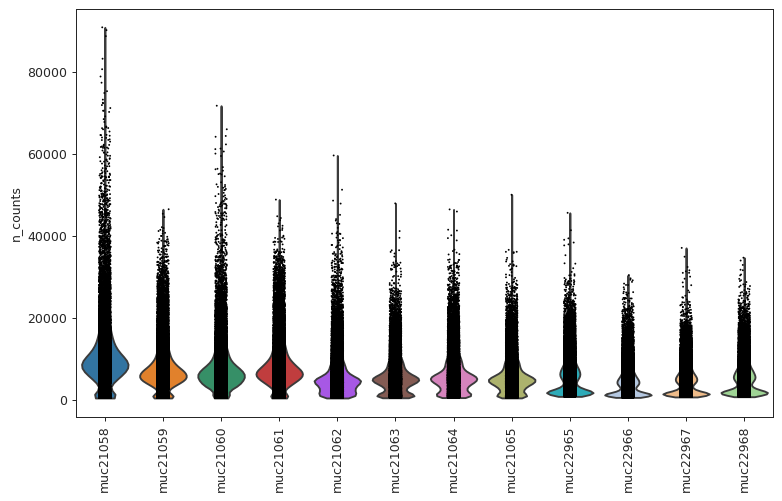

/home/agando/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/agando/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


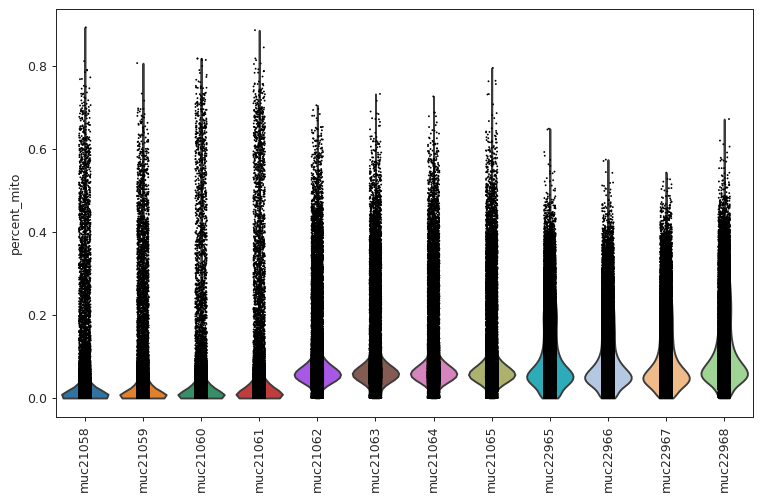

/home/agando/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/agando/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


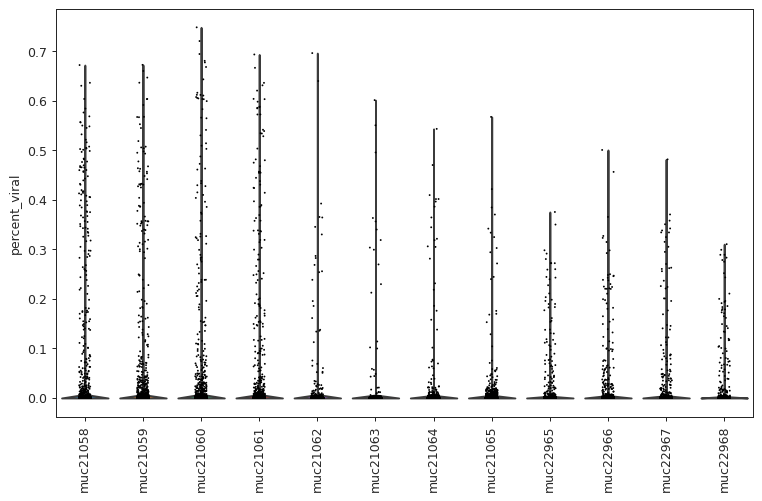

In [12]:
sc.pl.violin(adata, "n_counts", groupby = "identifier", size = 1.5, ax = mysize(10, 6, 90), rotation = 90)
sc.pl.violin(adata, "percent_mito", groupby = "identifier", size = 1.5, ax = mysize(10, 6, 90), rotation = 90)
sc.pl.violin(adata, "percent_viral", groupby = "identifier", size = 1.5, ax = mysize(10, 6, 90), rotation = 90)

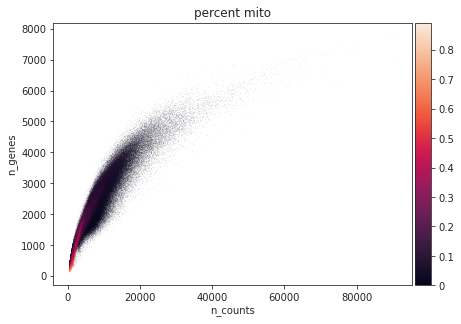

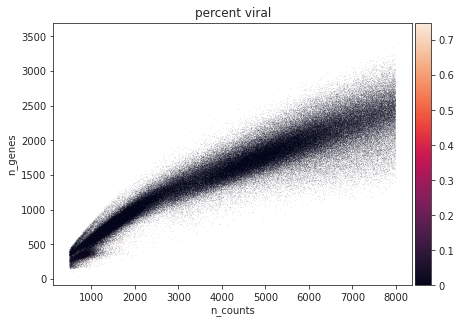

In [14]:
#Data quality summary plots
sc.pl.scatter(adata, "n_counts", "n_genes", color = "percent_mito")#, ax = mysize(8, 6, 100))

## Zoom in to range
sc.pl.scatter(adata[adata.obs["n_counts"] < 8000],"n_counts", "n_genes", color = "percent_viral") #ax = mysize(6,5,100)

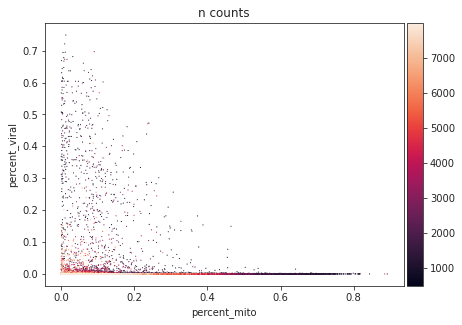

In [17]:
sc.pl.scatter(adata[adata.obs["n_counts"] < 8000], "percent_mito", "percent_viral", color = "n_counts", size = 5)

/home/agando/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/agando/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


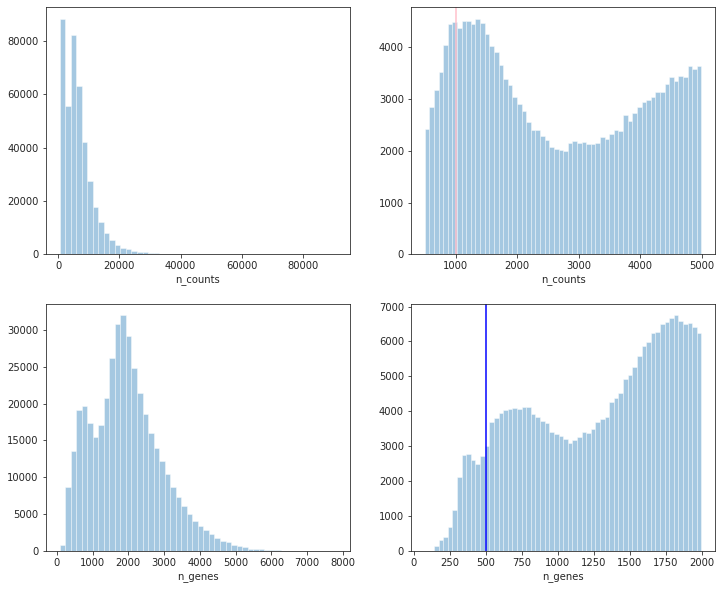

In [20]:
#Thresholding decision: counts (by default lower cut at 200 when reading in dges)
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 10))
axs = axs.ravel()

sb.distplot(adata.obs['n_counts'], kde = False, ax = axs[0])
sb.distplot(adata.obs['n_counts'][adata.obs['n_counts'] < 5000], kde = False, bins = 60, ax = axs[1])
sb.distplot(adata.obs['n_genes'], kde = False, ax = axs[2])
sb.distplot(adata.obs['n_genes'][adata.obs['n_genes'] < 2000], kde = False, bins = 60, ax = axs[3])

axs[1].axvline(1000, color = "pink") # not considered
#axs[1].axvline(1500, color = "pink")
axs[3].axvline(500, color = "blue")
#axs[3].axvline(1200, color = "pink")
plt.show()

### Actually do the Filtering for remaining QC Parameters

In [21]:
print('Total number of cells: {:d}'.format(adata.n_obs))

sc.pp.filter_cells(adata, max_counts = 30000)
#print('Number of cells after max count filter: {:d}'.format(adata.n_obs))

## Skip this filter this time
## min_counts = 500 already considered, but you can increase the value if desired here
#sc.pp.filter_cells(adata, min_counts = 1500)

sc.pp.filter_cells(adata, min_genes = 500)
print('Number of cells after min count filter: {:d}'.format(adata.n_obs))

sc.pp.filter_genes(adata, min_cells = 3)
print('Number of cells after gene filter: {:d}'.format(adata.n_obs))

## a higher threshold for percent mito
adata = adata[adata.obs["percent_mito"] < 0.2]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

Total number of cells: 414497
filtered out 1943 cells that have more than 30000 counts
filtered out 18578 cells that have less than 500 genes expressed
Number of cells after min count filter: 393976
filtered out 2520 genes that are detected in less than 3 cells
Number of cells after gene filter: 393976
Number of cells after MT filter: 355499


### Plots after Filtering

In [23]:
import warnings
warnings.filterwarnings("ignore")

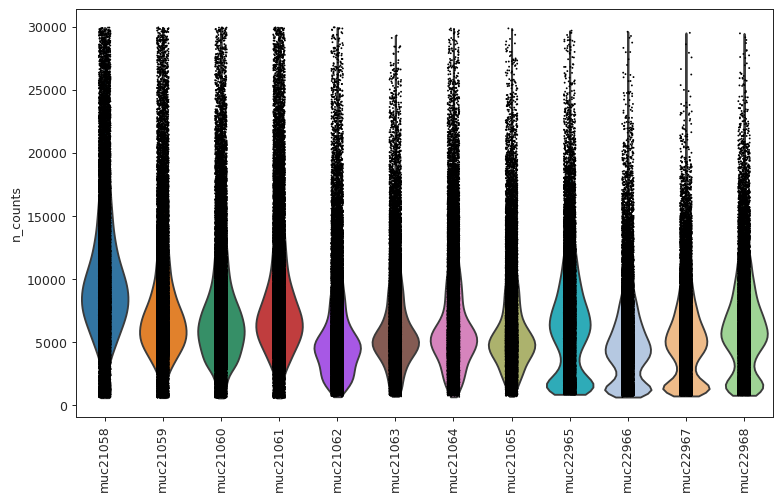

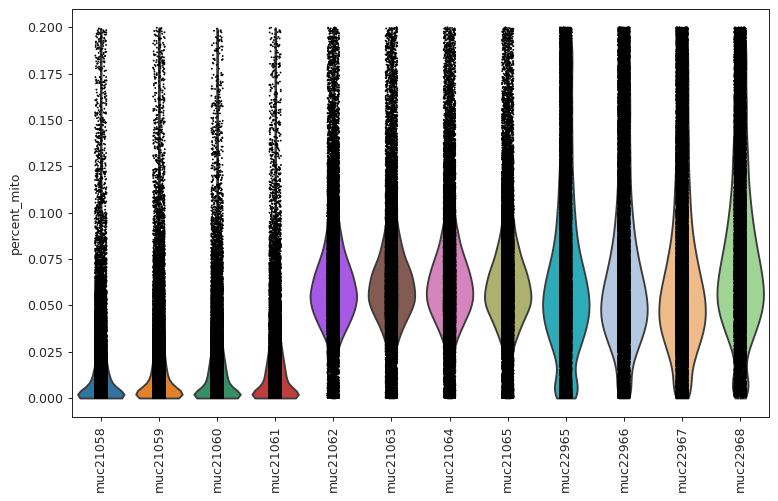

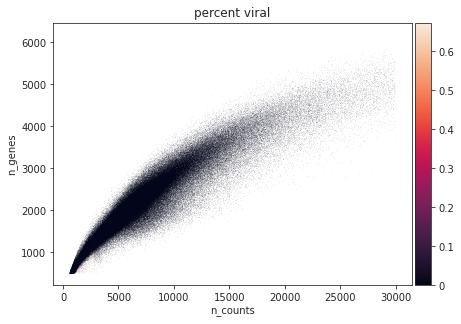

In [25]:
group = "identifier"
sc.pl.violin(adata, "n_counts", groupby = group, size = 1.5, rotation = 90, ax = mysize(10, 6, 90))
sc.pl.violin(adata, "percent_mito", groupby = group, size = 1.5, rotation = 90, ax = mysize(10, 6, 90))
sc.pl.scatter(adata, "n_counts", "n_genes", color = "percent_viral")

In [27]:
## Summary Statistics after Filtering
info = pd.DataFrame(data = adata.obs.identifier.cat.categories, columns = ["identifier"])
info["n_counts"] = adata.obs.groupby(["identifier"])["n_counts"].median().values
info["n_genes"] = adata.obs.groupby(["identifier"])["n_genes"].median().values
info["percent_mito"] = adata.obs.groupby(["identifier"])["percent_mito"].mean().values
info["percent_viral"] = adata.obs.groupby(["identifier"])["percent_viral"].mean().values
info["viral_counts"] = adata.obs.groupby(["identifier"])["viral_counts"].mean().values
info["n_cells"] = adata.obs.groupby(["identifier"])["n_counts"].size().values
info

identifier  n_counts  n_genes  percent_mito  percent_viral  viral_counts  \
0    muc21058    9491.0     2491      0.016263       0.000680      3.171216   
1    muc21059    6889.0     2129      0.019011       0.000588      2.413042   
2    muc21060    6726.0     2024      0.018212       0.000398      1.770198   
3    muc21061    7386.0     2131      0.019670       0.000319      1.608596   
4    muc21062    5000.0     1813      0.063879       0.000173      0.848817   
5    muc21063    5638.0     1974      0.064816       0.000185      0.705393   
6    muc21064    5795.0     1975      0.065792       0.000244      1.063794   
7    muc21065    5431.0     1898      0.064479       0.000261      1.151739   
8    muc22965    6374.0     2111      0.077145       0.000395      1.466652   
9    muc22966    4660.0     1684      0.078298       0.000391      1.099040   
10   muc22967    5144.0     1795      0.077492       0.000343      1.096250   
11   muc22968    6095.0     2044      0.083272       0.000363      1.253071   

    n_cells  
0     28613  
1     31912  
2     32602  
3     30641  
4     32583  
5     26941  
6     32213  
7     31877  
8     26388  
9     28847  
10    29683  
11    23199

In [29]:
adata

View of AnnData object with n_obs × n_vars = 355499 × 18115
    obs: 'identifier', 'barcode_round', 'name', 'patient', 'n_counts', 'n_genes', 'percent_mito', 'viral_counts', 'percent_viral'
    var: 'n_cells'
    uns: 'identifier_colors'

### Use nomalize_per_cell instead of SCRAN this time

In [30]:
## Delete the list of individual adatas
del adatas

In [32]:
## New - store counts and Raw Layer as sparse matrices
from scipy import sparse

#Keep the count data in a counts layer (before normalization !)
adata.layers["counts"] = sparse.csr_matrix(adata.X.copy())

## Normalize adata and Log Transform
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

## no don’t, as I won’t be regressing this object -> store as sparse after PC calculation!
# Store the full data set in 'raw' as log-normalised data for statistical testing (e.g. Marker Genes)
#adata.raw = sc.AnnData(X = sparse.csr_matrix(adata.X))
#adata.raw.var.index = adata.var_names.copy()

normalizing by total count per cell
    finished (0:00:25): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [36]:
print(type(adata.layers["counts"]))
print(adata.layers["counts"][20:25, 20:35].todense())
print(type(adata.X))
adata.X[20:25, 20:25]

<class 'anndata._core.views.SparseCSRView'>
[[0. 0. 0. 1. 0. 5. 1. 3. 0. 0. 0. 0. 1. 0. 2.]
 [0. 0. 0. 1. 0. 3. 1. 1. 0. 0. 2. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 3. 0. 3. 0. 0. 1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 0. 3. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 0. 0. 0. 5.]]
<class 'numpy.ndarray'>


array([[0.        , 0.        , 0.        , 0.3623782 , 0.        ],
       [0.        , 0.        , 0.        , 0.3508792 , 0.        ],
       [0.3972809 , 0.        , 0.        , 0.        , 0.        ],
       [0.38987657, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

### Highly Variable Gene Selection

extracting highly variable genes
    finished (0:00:53)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


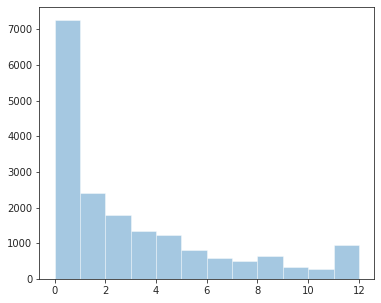

In [37]:
batch = "identifier"
sc.pp.highly_variable_genes(adata, min_disp = None, max_disp = None, min_mean = None, max_mean = None, 
                                batch_key = batch, n_top_genes = 4000, n_bins = 20, flavor = "cell_ranger", 
                                subset = False)
vartab = pd.DataFrame(adata.var["highly_variable_nbatches"], index = adata.var_names)
sb.distplot(vartab, kde = False, bins = len(np.unique(adata.obs[batch])))

In [40]:
thresh = 3
hvgs = vartab[vartab.highly_variable_nbatches.values >= thresh].index
print("%s Genes kept, variable in at least %s samples" %(len(hvgs), thresh))

6658 Genes kept, variable in at least 3 samples


### Remove Cell cycle Genes from list of variable genes

In [42]:
## Human
cc_genes = [x.strip() for x in open("/home/agando/Documents/Meshal/PhD_Scripts/" + 
                                    "for_orientation/regev_lab_cell_cycle_genes.txt")]

hvgs = np.setdiff1d(hvgs, cc_genes)
adata.var["highly_variable"] = [g in hvgs for g in adata.var_names]
sum(adata.var["highly_variable"])

6592

### Calculate cell cycle Score

In [41]:
cc_genes = [x.strip() for x in open("/home/agando/Documents/Meshal/PhD_Scripts/" + 
                                    "for_orientation/regev_lab_cell_cycle_genes.txt")]
s_genes = cc_genes[:43]
g2m_genes = cc_genes[43:]
cc_genes = np.intersect1d(adata.var_names, cc_genes)
sc.tl.score_genes_cell_cycle(adata, s_genes = s_genes, g2m_genes = g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    643 total control genes are used. (0:00:17)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    639 total control genes are used. (0:00:17)
-->     'phase', cell cycle phase (adata.obs)


#### [ Skip Regression ]

### Visualization

In [43]:
import warnings
warnings.filterwarnings('ignore')
type(adata.X)

numpy.ndarray

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:43)


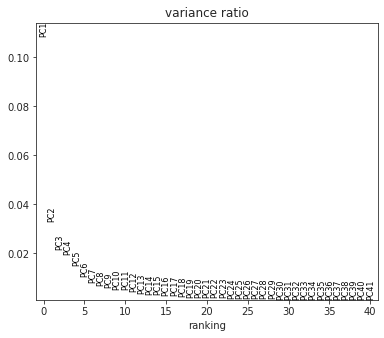

In [44]:
sc.pp.pca(adata, n_comps = 50, use_highly_variable = True)
sc.pl.pca_variance_ratio(adata, n_pcs = 40)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:58)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:04:35)


... storing 'phase' as categorical


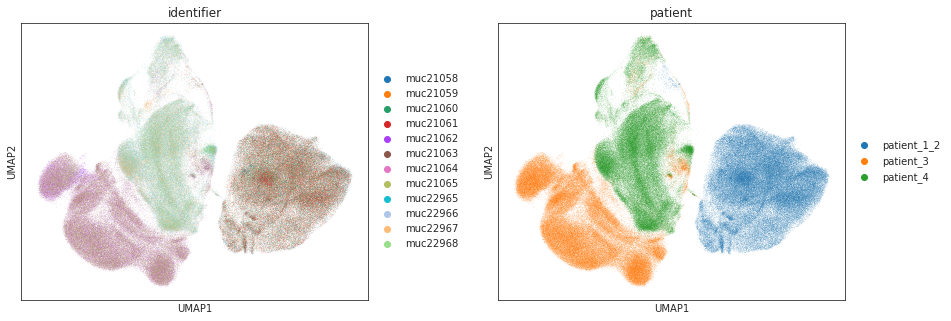

In [45]:
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 10)

sc.tl.umap(adata)
sc.pl.umap(adata, color = ["identifier", "patient"], wspace = 0.25)

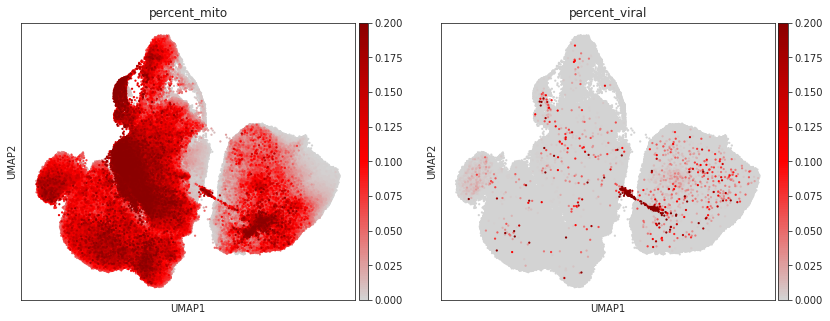

In [48]:
sc.pl.umap(adata, color = ["percent_mito", "percent_viral"], cmap = gray_red, size = 20, vmax = 0.2)

#### bbknn

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:45)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:05:02)


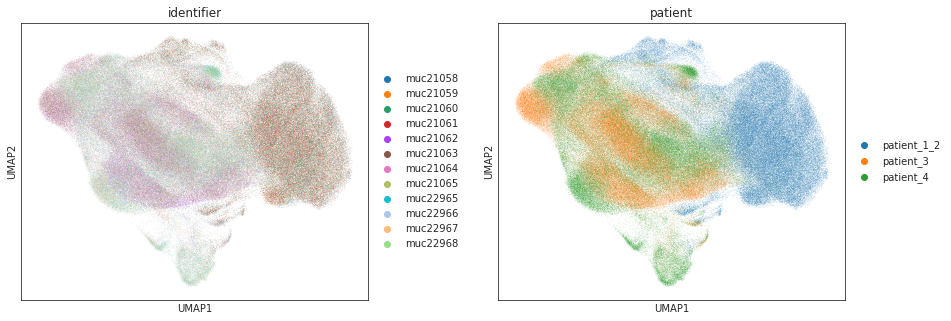

In [50]:
## Keep this one
import bbknn 
bbknn.bbknn(adata, n_pcs = 20, neighbors_within_batch = 5, batch_key = "patient")
#sc.tl.louvain(adata, resolution = 1)
#sc.tl.louvain(adata, resolution = 2, key_added = "louvain_2")

sc.tl.umap(adata)
sc.pl.umap(adata, color = ["identifier", "patient"], wspace = 0.25)

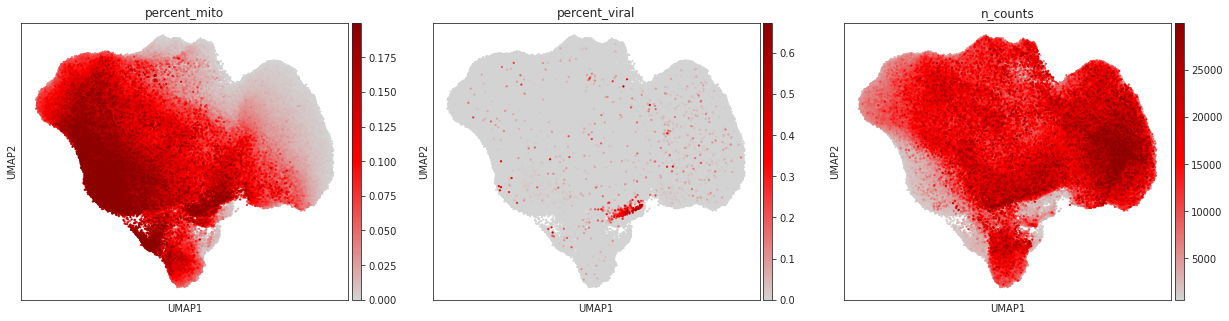

In [56]:
sc.pl.umap(adata, color = ["percent_mito", "percent_viral", "n_counts"], cmap = gray_red, size = 20)

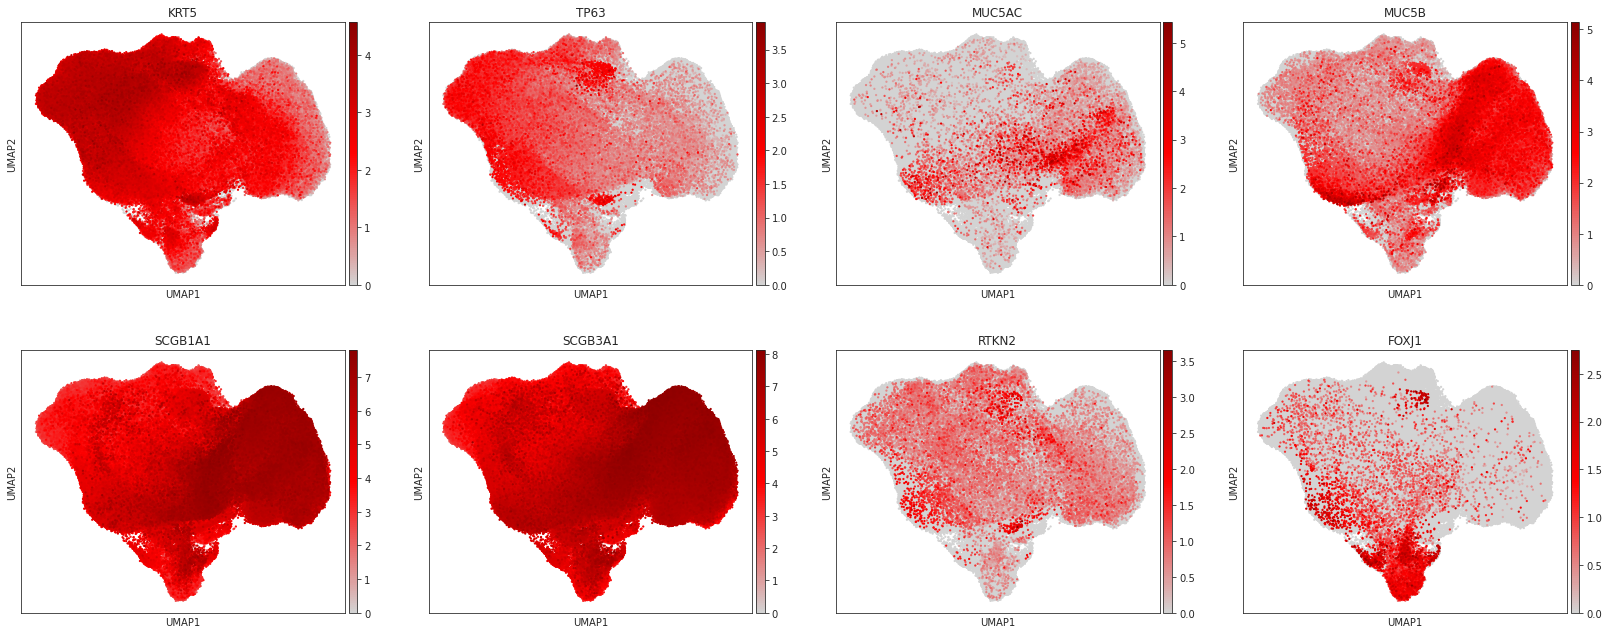

In [51]:
sc.pl.umap(adata, color = ["KRT5", "TP63", "MUC5AC", "MUC5B", "SCGB1A1", "SCGB3A1",
                           "RTKN2", "FOXJ1"], cmap = gray_red, size = 20)

### Sparsify X layer again and save object

In [54]:
from scipy import sparse
print(type(adata.X))
adata.X = sparse.csr_matrix(adata.X)
print(type(adata.X))
adata.X[20:25, 20:25].todense()

<class 'numpy.ndarray'>
<class 'scipy.sparse.csr.csr_matrix'>


matrix([[0.        , 0.        , 0.        , 0.3623782 , 0.        ],
        [0.        , 0.        , 0.        , 0.3508792 , 0.        ],
        [0.3972809 , 0.        , 0.        , 0.        , 0.        ],
        [0.38987657, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],
       dtype=float32)

In [55]:
adata.write(folder + "201206_covid19_ALI.h5ad")

### Add Treatment and additional columns from demultiplexing on top [skipped the code]

In [51]:
tab = tab.loc[:, ["final_calls", "final_bcs", "dbscan", "treatment"]].copy()
tab.columns = ["deMULTIplex_calls", "final_calls", "dbscan", "treatment_virus"]
tab["treatment"] = [str(t).replace(" + sars-cov-2", "") for t in tab.treatment_virus]
tab.head()

deMULTIplex_calls final_calls  dbscan  \
muc21058_TGAGCATCACATGGTT     BC25-CGAAGCCC        BC25       1   
muc21058_GTGTCCTAGTGGTGAC           Doublet        BC16      28   
muc21058_TTGAGTGGTCACCGAC     BC31-TTACGGTG        BC31       2   
muc21058_TGCTTCGAGGAATTAC     BC31-TTACGGTG        BC24       3   
muc21058_TCATTTGGTTCTCGCT      BC5-AGAGAGAG         BC5       4   

                                  treatment_virus   treatment  
muc21058_TGAGCATCACATGGTT                    mock        mock  
muc21058_GTGTCCTAGTGGTGAC  Sorafenib + sars-cov-2   Sorafenib  
muc21058_TTGAGTGGTCACCGAC                    TNFa        TNFa  
muc21058_TGCTTCGAGGAATTAC   TNFa_DDA + sars-cov-2    TNFa_DDA  
muc21058_TCATTTGGTTCTCGCT              IFNa (b_d)  IFNa (b_d)

In [52]:
meta = pd.merge(meta, tab, left_index = True, right_index = True, how = "inner")
meta.treatment.replace("nan", np.nan, inplace = True)
print(meta.shape)
meta.head()

(257922, 17)


identifier barcode_round             name  \
muc21058_AAACCCAAGCTCGTGC   muc21058         ALI_1  ALI_1_Barcode_1   
muc21058_AAACCCAAGTTGAAAC   muc21058         ALI_1  ALI_1_Barcode_1   
muc21058_AAACCCAAGTTTGAGA   muc21058         ALI_1  ALI_1_Barcode_1   
muc21058_AAACCCACACGCGCAT   muc21058         ALI_1  ALI_1_Barcode_1   
muc21058_AAACCCACAGACACAG   muc21058         ALI_1  ALI_1_Barcode_1   

                               patient  n_counts  n_genes  percent_mito  \
muc21058_AAACCCAAGCTCGTGC  patient_1_2   15356.0     2819      0.021034   
muc21058_AAACCCAAGTTGAAAC  patient_1_2    9919.0     2910      0.002520   
muc21058_AAACCCAAGTTTGAGA  patient_1_2    9775.0     2088      0.000307   
muc21058_AAACCCACACGCGCAT  patient_1_2   12826.0     2568      0.014580   
muc21058_AAACCCACAGACACAG  patient_1_2   15557.0     3911      0.007842   

                           viral_counts  percent_viral   S_score  G2M_score  \
muc21058_AAACCCAAGCTCGTGC           0.0            0.0 -0.019703  -0.106571   
muc21058_AAACCCAAGTTGAAAC           0.0            0.0 -0.052343  -0.121160   
muc21058_AAACCCAAGTTTGAGA           0.0            0.0 -0.050139  -0.110812   
muc21058_AAACCCACACGCGCAT           0.0            0.0 -0.022872  -0.119697   
muc21058_AAACCCACAGACACAG           0.0            0.0 -0.052256  -0.111447   

                          phase deMULTIplex_calls final_calls  dbscan  \
muc21058_AAACCCAAGCTCGTGC    G1          Negative         NaN       8   
muc21058_AAACCCAAGTTGAAAC    G1          Negative        BC27      29   
muc21058_AAACCCAAGTTTGAGA    G1     BC31-TTACGGTG        BC22      21   
muc21058_AAACCCACACGCGCAT    G1      BC5-AGAGAGAG         BC5       4   
muc21058_AAACCCACAGACACAG    G1      BC7-GAAAAGGG         BC7      38   

                                  treatment_virus   treatment  
muc21058_AAACCCAAGCTCGTGC                     NaN         NaN  
muc21058_AAACCCAAGTTGAAAC              IFNa (b_d)  IFNa (b_d)  
muc21058_AAACCCAAGTTTGAGA  TNFa_IFNg + sars-cov-2   TNFa_IFNg  
muc21058_AAACCCACACGCGCAT              IFNa (b_d)  IFNa (b_d)  
muc21058_AAACCCACAGACACAG                    IFNg        IFNg

In [59]:
pd.crosstab(adata.obs.final_calls, adata.obs.barcode_round)

barcode_round  ALI_1  ALI_2  ALI_3
final_calls                       
BC1             1632   2071   1523
BC2             2043   2033   2101
BC3             1761   2419   2104
BC4             1861   2468   2498
BC5             2109   2465   2230
BC6             1701   1555   2530
BC7             2303   2879   2335
BC8             1253   2908   2434
BC9             1823   2834   1922
BC10            1573   2877   2343
BC11            1973   2636   2453
BC12            1978   2710   2438
BC13            1671   2697   2573
BC14            1551   2475   2663
BC15            1695   3173   3159
BC16            1864   1837   2795
BC17            1957   3168   1858
BC18            1843   3358   2702
BC19            1674   2063   2375
BC20            1044   2258   2389
BC21            1547   1927   2076
BC22            1875   1825   2301
BC23            2400   2244   1768
BC24            1944   2303   2142
BC25            1683   2271   2953
BC26            1666   2249   1883
BC27            3029   2162   2023
BC28            2885   2227   2282
BC29            2502   1339   2539
BC30            1740   2390   2345
BC31            2400   1679    179
BC32            1644      0   2285
BC33            1151      0   1956
BC34            2740      0   1976
BC35            1256      0   1738
BC36            1141      0   2160
BC37            1710      0      0
Doublet         8479  17175   7884
nan             2228      3      0

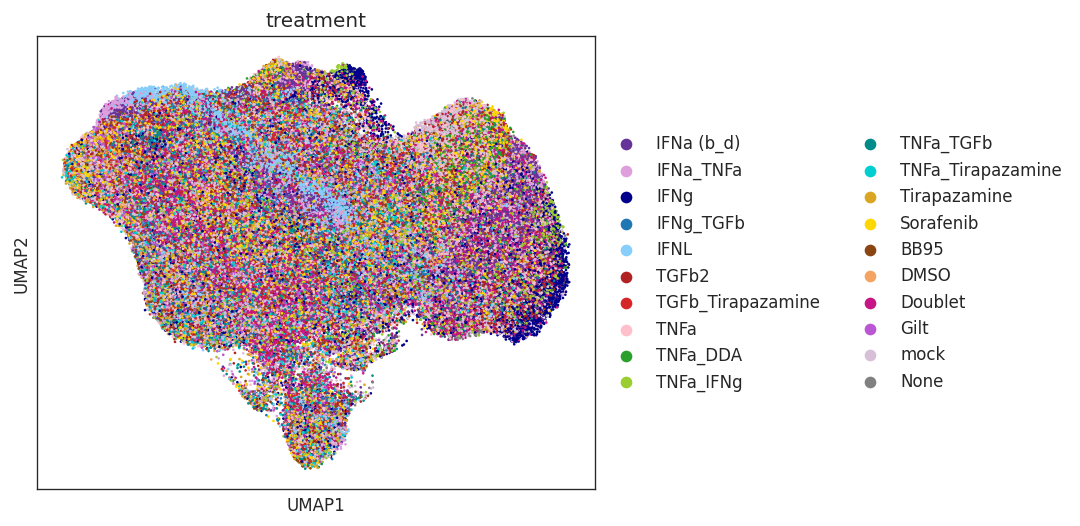

In [81]:
## Set colours again as before, new Treatments:
## BB95, DMSO, Gilt, INFL, IFNg_TGFb, TGFb2_Tirapazamine, TNFa_IFNg, 

#adata.obs.treatment.replace("nan", "None", inplace = True)
#order = ['IFNa (b_d)', 'IFNa_TNFa', 'IFNg', 'IFNg_TGFb', 'IFNL', 'TGFb2', 'TGFb_Tirapazamine',
#         'TNFa', 'TNFa_DDA', 'TNFa_IFNg', 'TNFa_TGFb', 'TNFa_Tirapazamine', 'Tirapazamine', "Sorafenib",
#         'BB95', 'DMSO', 'Doublet', 'Gilt', "mock", "None"]

pal = [ "rebeccapurple", "plum", "darkblue", "tab:blue", "lightskyblue", "firebrick", "tab:red", "pink",
           "tab:green", "yellowgreen", "darkcyan", "darkturquoise", "goldenrod", "gold",
           "saddlebrown", "sandybrown", "mediumvioletred", "mediumorchid", "thistle", "gray"]

adata.obs.treatment.cat.reorder_categories(order, inplace = True)
sc.pl.umap(adata, color = ["treatment"], ax = mysize(6, 5, 120), size = 10, palette = pal)

In [82]:
## Save this whole object (filtered out those cells that are not in demultiplex files)
adata.write(folder + "201206_covid19_ALI.h5ad")

### Subset to only assigned cells and recalculate PCs

In [96]:
adata = adata[-adata.obs.treatment.isin(["None", "Doublet"])].copy()
print(adata.shape)
#sc.pl.umap(adata, color = ["treatment"], size = 10)

(221974, 18115)


computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:05)


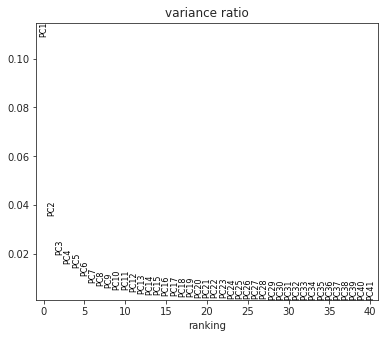

In [98]:
sc.pp.pca(adata, n_comps = 50, use_highly_variable = True)
sc.pl.pca_variance_ratio(adata, n_pcs = 40)

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:27)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:57)


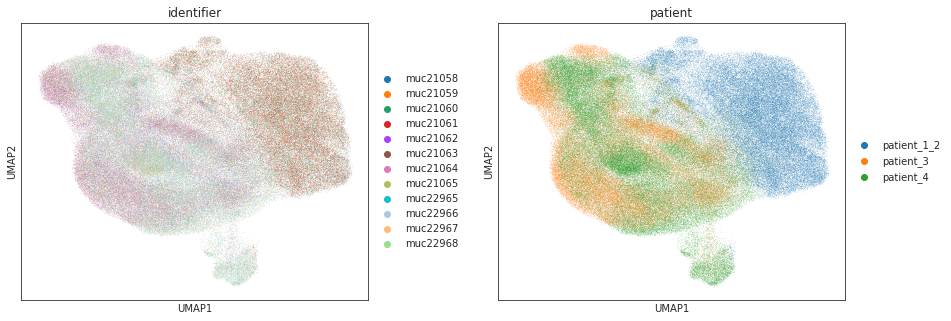

In [99]:
## Keep this one
import bbknn 
bbknn.bbknn(adata, n_pcs = 20, neighbors_within_batch = 5, batch_key = "patient")
sc.tl.umap(adata)
sc.pl.umap(adata, color = ["identifier", "patient"], wspace = 0.25)

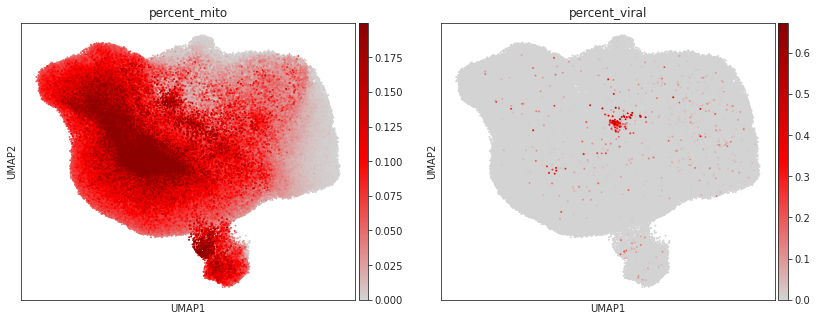

In [100]:
sc.pl.umap(adata, color = ["percent_mito", "percent_viral"], cmap = gray_red, size = 15)

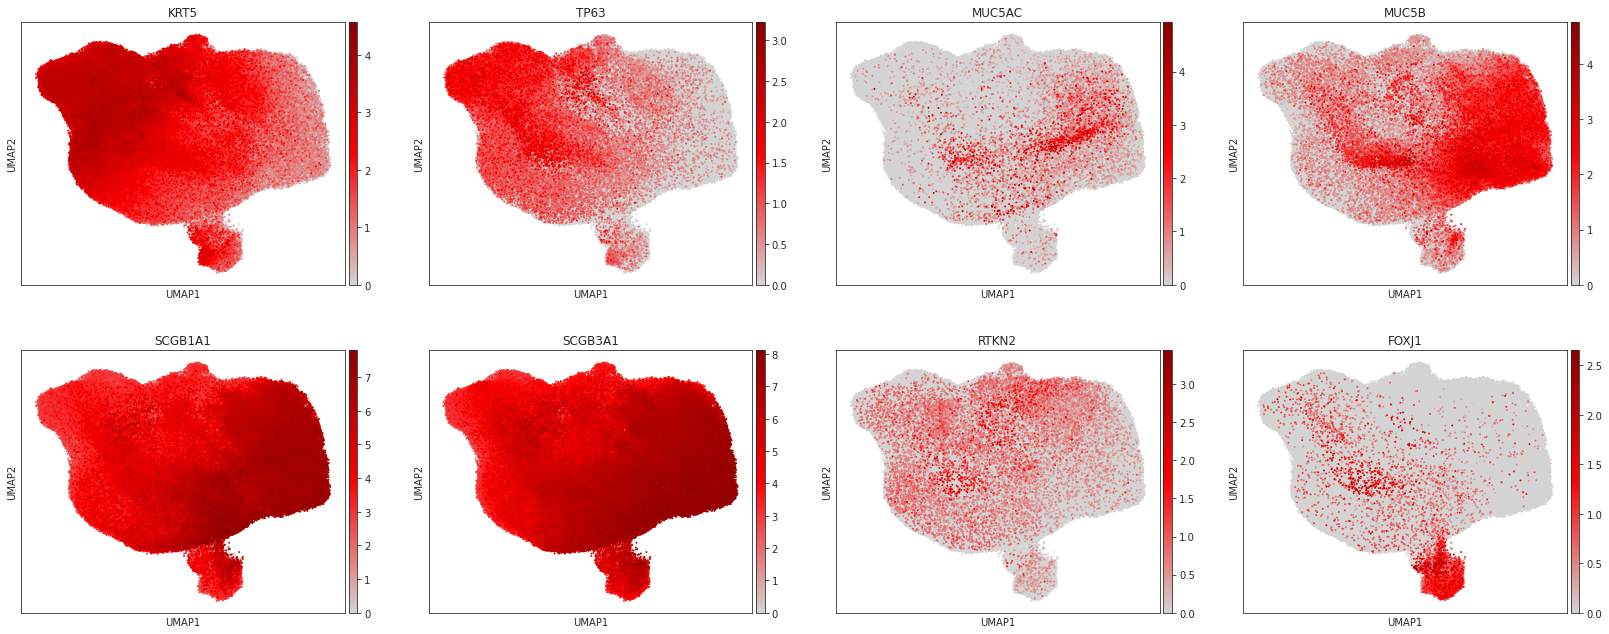

In [101]:
sc.pl.umap(adata, color = ["KRT5", "TP63", "MUC5AC", "MUC5B", "SCGB1A1", "SCGB3A1",
                           "RTKN2", "FOXJ1"], cmap = gray_red, size = 15)

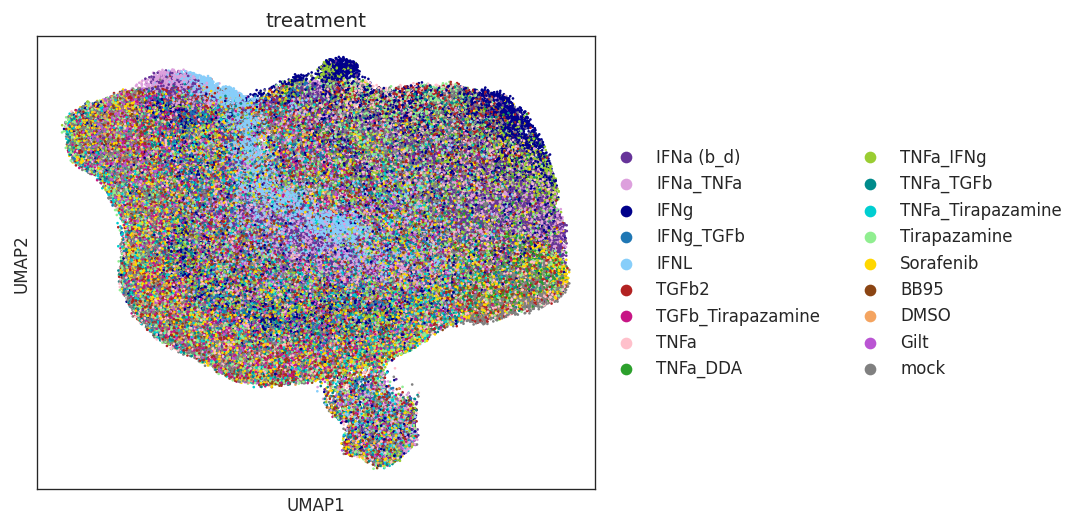

In [106]:
pal = [ "rebeccapurple", "plum", "darkblue", "tab:blue", "lightskyblue", "firebrick", "mediumvioletred", "pink",
           "tab:green", "yellowgreen", "darkcyan", "darkturquoise", "lightgreen", "gold", "saddlebrown",
           "sandybrown", "mediumorchid", "gray"]

sc.pl.umap(adata, color = ["treatment"], ax = mysize(6, 5, 120), size = 10, palette = pal)

In [108]:
adata.obs.treatment.cat.categories

Index(['IFNa (b_d)', 'IFNa_TNFa', 'IFNg', 'IFNg_TGFb', 'IFNL', 'TGFb2',
       'TGFb_Tirapazamine', 'TNFa', 'TNFa_DDA', 'TNFa_IFNg', 'TNFa_TGFb',
       'TNFa_Tirapazamine', 'Tirapazamine', 'Sorafenib', 'BB95', 'DMSO',
       'Gilt', 'mock'],
      dtype='object')

### Highlight each Treatment

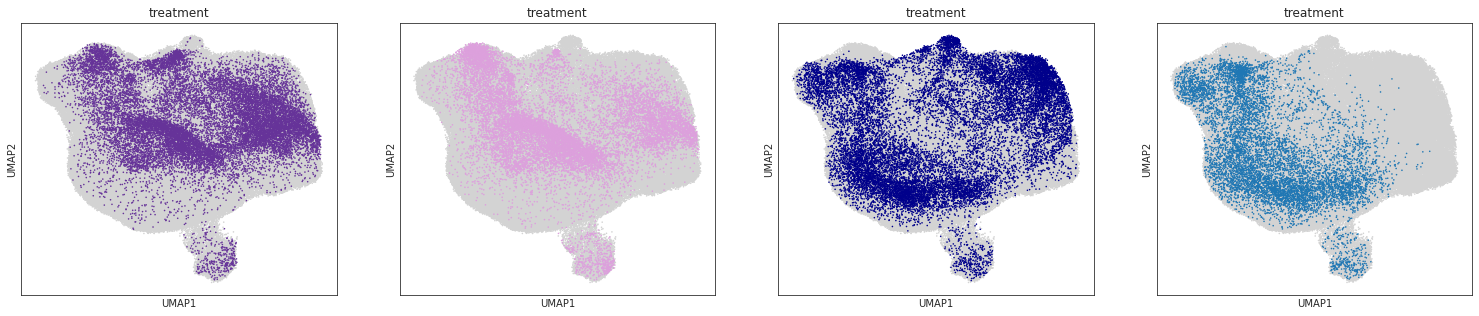

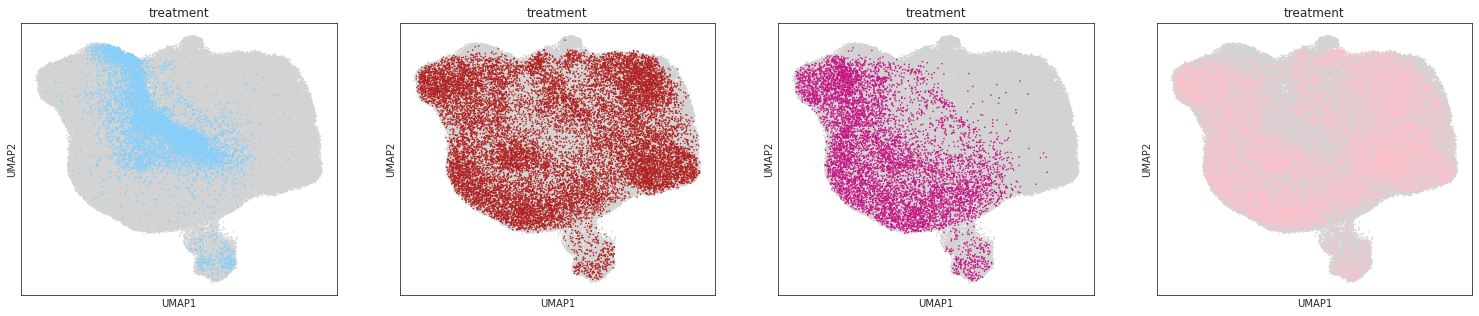

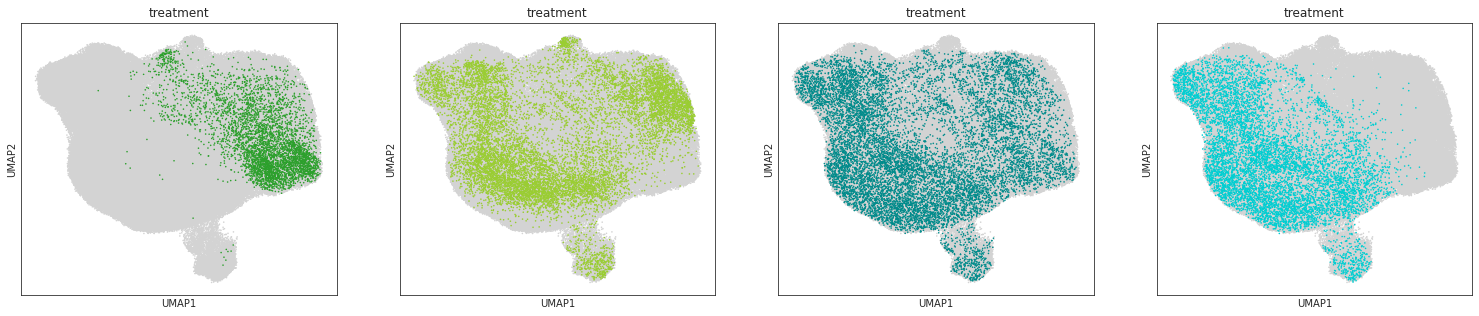

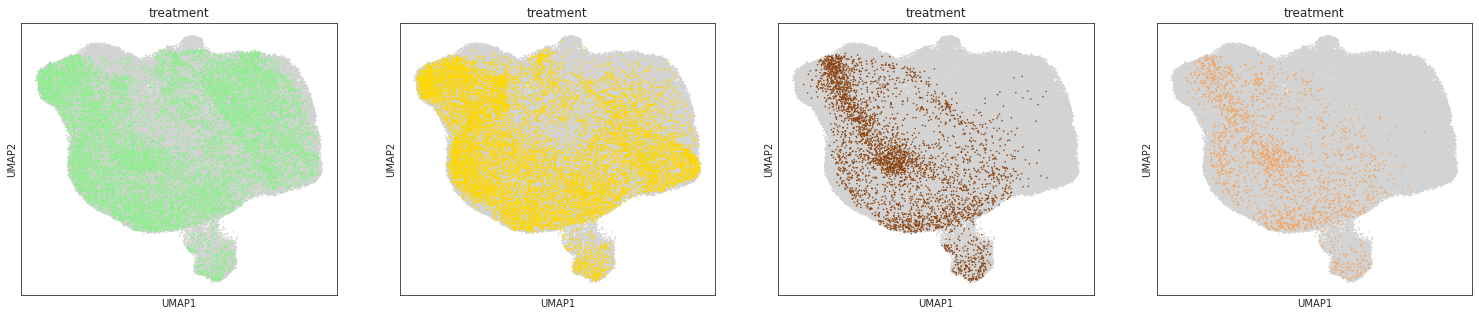

In [115]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
#axs.ravel()
for i, treat in enumerate(['IFNa (b_d)', 'IFNa_TNFa', 'IFNg', 'IFNg_TGFb']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)
plt.show()

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
for i, treat in enumerate(['IFNL', 'TGFb2', 'TGFb_Tirapazamine', 'TNFa']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)
plt.show()

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
for i, treat in enumerate(['TNFa_DDA', 'TNFa_IFNg', 'TNFa_TGFb', 'TNFa_Tirapazamine']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)
plt.show()

fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
for i, treat in enumerate(['Tirapazamine', 'Sorafenib', 'BB95', 'DMSO']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)
plt.show()

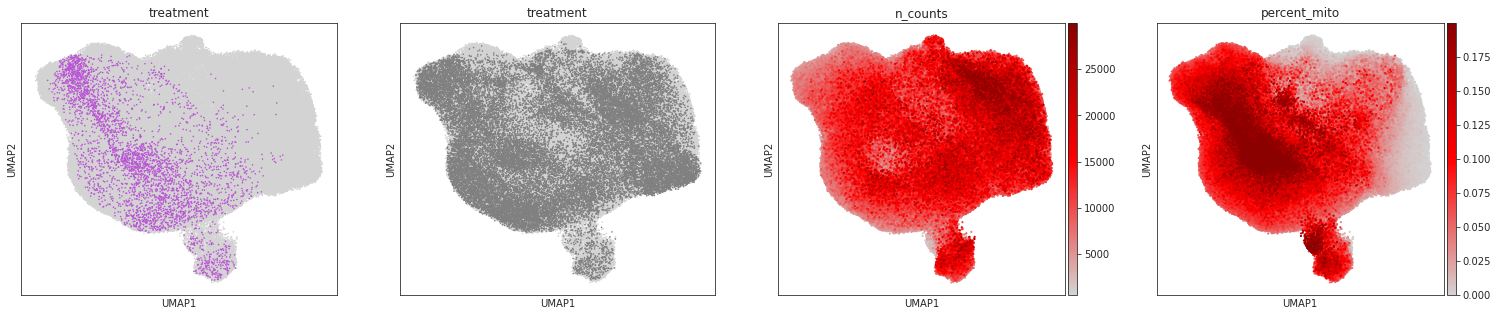

In [116]:
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize=(26, 5))
#axs.ravel()
for i, treat in enumerate(['Gilt', 'mock']):
    sc.pl.umap(adata, color = ["treatment"], groups = [treat], size = 10, legend_loc = None, ax = axs[i], show = False)

sc.pl.umap(adata, color = ["n_counts"], cmap = gray_red, size = 20, ax = axs[2], show = False)
sc.pl.umap(adata, color = ["percent_mito"], cmap = gray_red, size = 20, ax = axs[3], show = False)
plt.show()

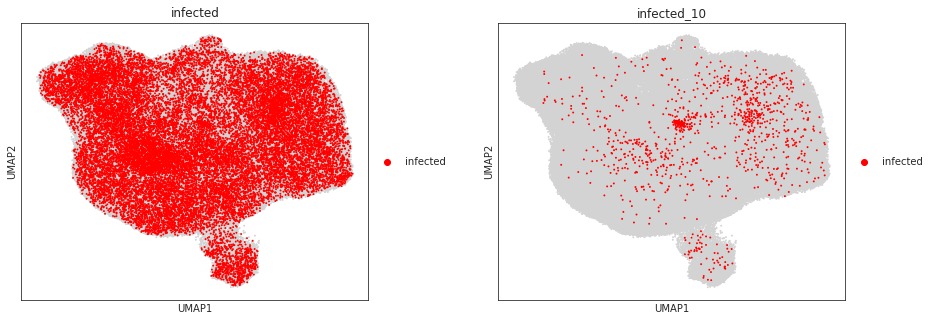

In [123]:
adata.obs["infected"] = ["infected" if nv > 0 else "non-infected" for nv in adata.obs.viral_counts]
adata.obs["infected_10"] = ["infected" if nv > 10 else "non-infected" for nv in adata.obs.viral_counts]

sc.pl.umap(adata, color = ["infected", "infected_10"], size = 15, groups = ["infected"], 
           wspace = 0.25, palette = ["red", "lightgray"])

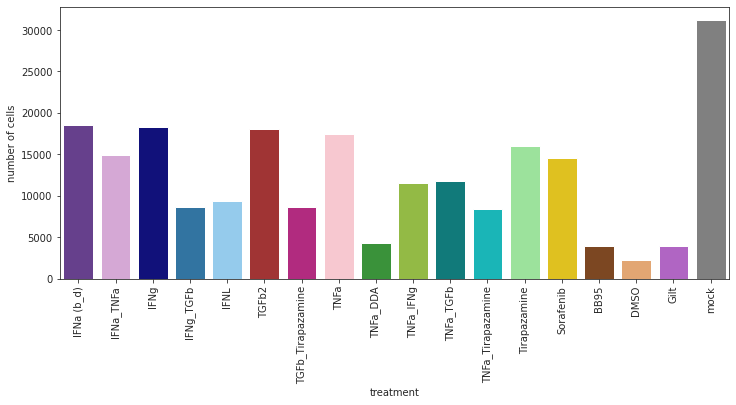

In [125]:
## Barplot
counts = adata.obs.treatment.value_counts().reset_index()
counts.columns = ["treatment", "number of cells"]

fig, ax = plt.subplots(figsize = (12, 5))
fig = sb.barplot(data = counts, x = "treatment", y = "number of cells", palette = adata.uns["treatment_colors"])
fig.set_xticklabels(fig.get_xticklabels(), rotation = 90)
plt.show()

In [129]:
## Save this as a separate Object
adata.write(folder + "201207_covid19_ALI_assigned.h5ad")